In [14]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

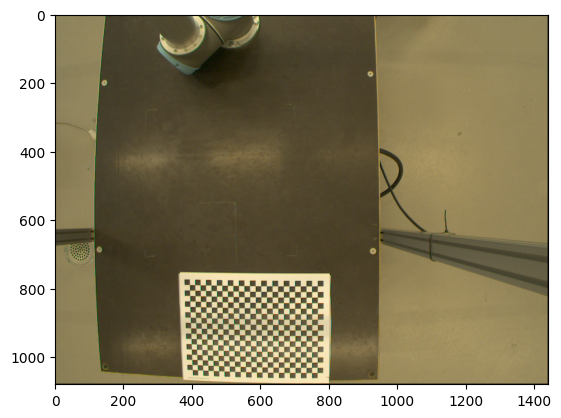

In [15]:
full_path = os.path.abspath(os.getcwd()) #get the full path of the current file directory

path = full_path+"/img1.png"
img = cv2.imread(path)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.show()

#### Two major kinds of distortion are:
    1.radial distortion 
    2.tangential distortion.
    
Radial distortion causes straight lines to appear curved.

Radial distortion becomes larger the farther points are from the center of the image. 

In below image, you can see the border of the desk is not a straight line and doesn't match with the purple line. All the expected straight lines are bulged out.

Similarly, tangential distortion occurs because the image-taking lense is not aligned perfectly parallel to the imaging plane. So, some areas in the image may look nearer than expected.


#### distortion reasone :

in practice, no manufactured lens is perfect, images captured by cameras are subject to distortion.

These distortions are divided into two main types, according to their selection

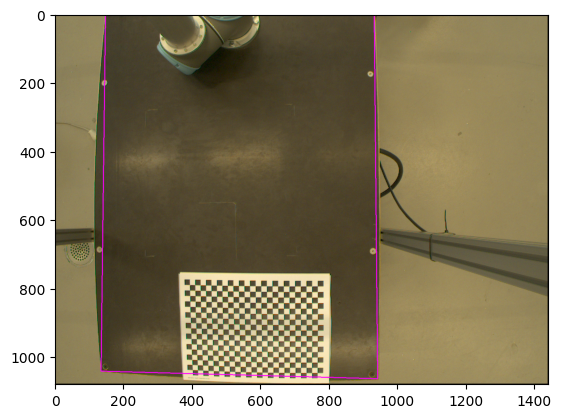

In [16]:
line_thickness = 2
img_hold = cv2.line(im_rgb, (147,0),(134,1042), (255, 0, 255), thickness=line_thickness)
img_hold = cv2.line(img_hold, (932,0),(942,1064), (255, 0, 255), thickness=line_thickness)
img_hold = cv2.line(img_hold, (134,1042),(942,1064), (255, 0, 255), thickness=line_thickness)
plt.imshow(img_hold)
plt.show()


we need to count the 'inside' corners.

we can easily use **findChessboardCorners** like below :


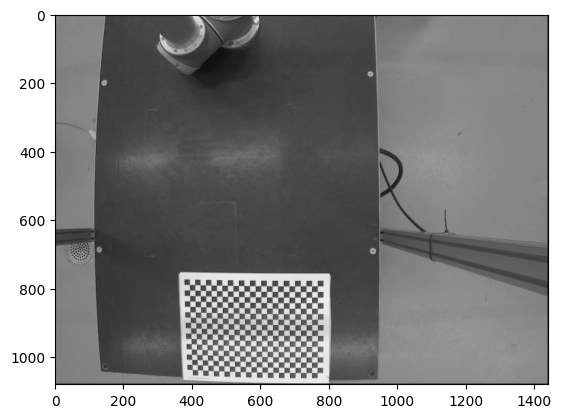

In [17]:
CHECKERBOARD = (24,17)
threedpoints = []
twodpoints = []

objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
                               
path = full_path+"/img1.png"
img = cv2.imread(path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(img_gray, CHECKERBOARD, None)

plt.imshow(img_gray,cmap='gray')

plt.show()

After finding ret and corners, by using cornerSubPix and drawChessboardCorners we'll plot circles in chess board 

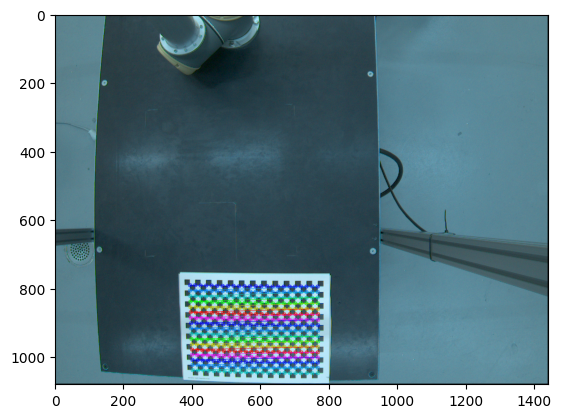

In [18]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

if ret == True:
    threedpoints.append(objectp3d)
    corners2 = cv2.cornerSubPix(img_gray,corners, (11,11), (-1,-1), criteria)
    img_hold = cv2.drawChessboardCorners(img, (24,17), corners2, ret)
    twodpoints.append(corners2)

plt.imshow(img_hold)
plt.show()

Ath the end by using calibrateCamera, we'll find ki and pi and we can calibrate img5

k1: -0.20625468220093468
k2: 0.19895320011233164
p1: -0.0008226067017545929
p1: -0.016491390046288943
k3: -0.18016533311994923


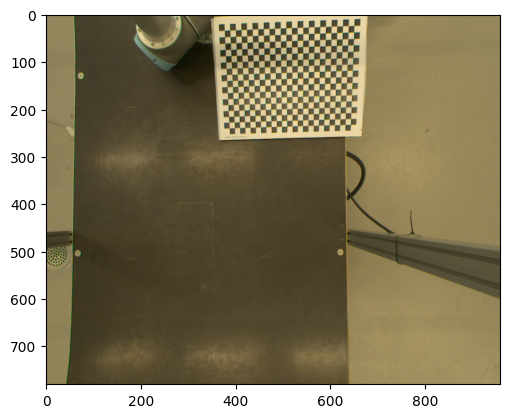

In [19]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(threedpoints, twodpoints, img_gray.shape[::-1], None, None)

print('k1: '+str(dist[0][0]))
print('k2: '+str(dist[0][1]))
print('p1: '+str(dist[0][2]))
print('p1: '+str(dist[0][3]))
print('k3: '+str(dist[0][4]))

path = full_path+"/img5.png"
img = cv2.imread(path)
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(dst_rgb)
plt.show()


#### we can find Re-projection Error : 

In [20]:
mean_error = 0
for i in range(len(threedpoints)):
    imgpoints2, _ = cv2.projectPoints(threedpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(twodpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(threedpoints)) )

total error: 0.011374533062662347


below code is exactly like previous code for calibrate img5 but in this section we have 4 images instead of 1 image for finding best ki and pi

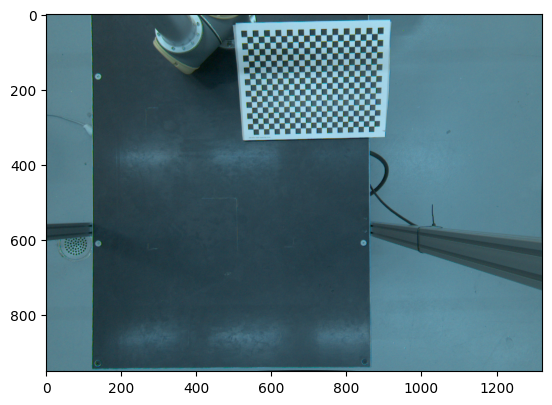

In [21]:
image_list = []
for counter in range(1,5):
    path = full_path+"/img"+str(counter)+".png"
    image_list.append(cv2.imread(path))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

CHECKERBOARD = (24,17)
threedpoints = []
twodpoints = []

objectp3d = np.zeros((1, CHECKERBOARD[0]* CHECKERBOARD[1],3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],0:CHECKERBOARD[1]].T.reshape(-1, 2)

for image in image_list :                                
    img = image

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img_gray, CHECKERBOARD, None)

    if ret == True:
        threedpoints.append(objectp3d)
        corners2 = cv2.cornerSubPix(img_gray,corners, (11,11), (-1,-1), criteria)
        twodpoints.append(corners2)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(threedpoints, twodpoints, img_gray.shape[::-1], None, None)
path = full_path+"/img5.png"
img = cv2.imread(path)
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.imshow(dst)
plt.show()

In [22]:
mean_error = 0
for i in range(len(threedpoints)):
    imgpoints2, _ = cv2.projectPoints(threedpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(twodpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(threedpoints)) )

4
total error: 0.08874621198171026
